In [4]:
import pandas as pd

df = pd.read_csv("vendas.csv")

In [15]:
print(df.head())

         data    produto  valor
0  2023-01-01  produto A  100.0
1  2023-01-02  produto B  150.0
2  2023-01-03  produto A  200.0
6  2023-01-05  produto A  180.0
7  2023-01-05  produto C  220.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     14 non-null     object 
 1   produto  12 non-null     object 
 2   valor    11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 464.0+ bytes
None


In [16]:
print("Analise exploratoria:")
print("Total de linhas :", len(df))
print("Resumo estatistico:\n ", df.describe())
print("\n")

Analise exploratoria:
Total de linhas : 9
Resumo estatistico:
              valor
count    9.000000
mean   177.777778
std     45.215533
min    100.000000
25%    150.000000
50%    190.000000
75%    210.000000
max    230.000000




In [20]:
for col in df:
  print(f"{col} quantidade de valores Nan: ", df[col].isna().sum())

data quantidade de valores Nan:  0
produto quantidade de valores Nan:  0
valor quantidade de valores Nan:  0


In [17]:
df['produto'].isna()

0     False
1     False
2     False
6     False
7     False
9     False
10    False
12    False
13    False
Name: produto, dtype: bool

In [13]:
df.dropna(inplace=True)

In [21]:
df['data'] = pd.to_datetime(df['data'])

0    2023-01-01
1    2023-01-02
2    2023-01-03
6    2023-01-05
7    2023-01-05
9    2023-01-06
10   2023-01-07
12   2023-01-08
13   2023-01-08
Name: data, dtype: datetime64[ns]

Visualização


In [23]:
vendas_por_produto = df.groupby("produto")["valor"].sum()

In [24]:
vendas_por_produto

produto
produto A    600.0
produto B    550.0
produto C    450.0
Name: valor, dtype: float64

In [25]:
produto_mais_rendeu = vendas_por_produto.idxmax()
produto_mais_rendeu

'produto A'

In [26]:
vendas_por_dia = df.groupby("data")["valor"].sum()
print(vendas_por_dia)
dia_mais_rendeu = vendas_por_dia.idxmax()
print("dia que mais vendeu: ", dia_mais_rendeu)

data
2023-01-01    100.0
2023-01-02    150.0
2023-01-03    200.0
2023-01-05    400.0
2023-01-06    190.0
2023-01-07    120.0
2023-01-08    440.0
Name: valor, dtype: float64
dia que mais vendeu:  2023-01-08 00:00:00


<Axes: title={'center': 'valor por produto'}, xlabel='produto'>

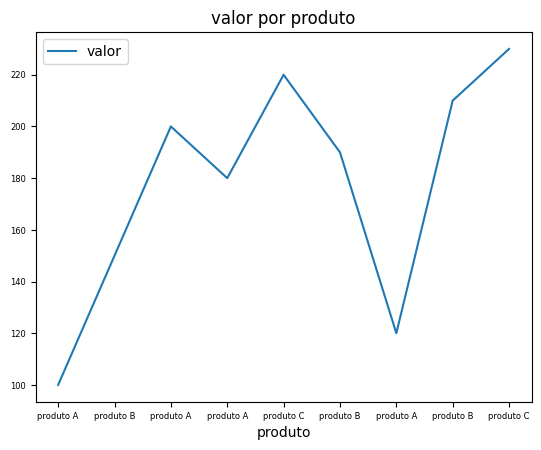

In [28]:
df.plot(
  x="produto", y = "valor", kind="line", title="valor por produto", fontsize = 6.0
)

<Axes: title={'center': 'valor por produto'}, xlabel='produto'>

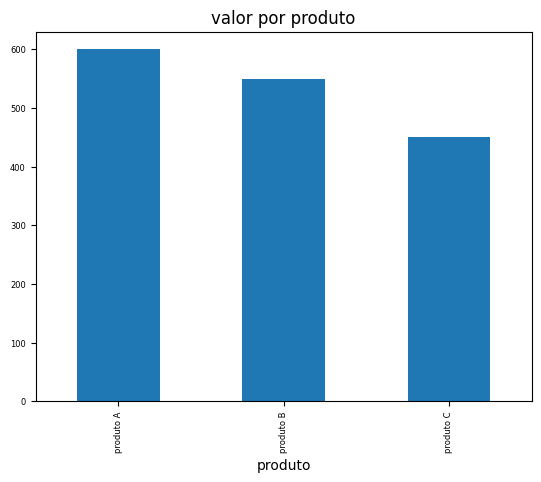

In [30]:
vendas_por_produto.plot(
  x="produto", y = "valor", kind="bar", title="valor por produto", fontsize = 6.0
)